# Task A: Two-class Signal Classification by FANNs

In [6]:
import help_code_ann_for_classification as help_code
signal_dataset = help_code.SignalDataset()  # Provides back a PyTorch Dataset OBJECT!
size_of_signal_dataset = len(signal_dataset)  # Print size of whole dataset

# Making a PyTorch DataLoader Object specifically for your Signal dataset that you got above.
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
signal_dataloader = DataLoader(dataset=signal_dataset, batch_size=32, shuffle=True)


*3.3 Problems*

In [7]:
#a)

length_of_signal = len(signal_dataset[0][0])
print(size_of_signal_dataset)
print(length_of_signal)

1384
500


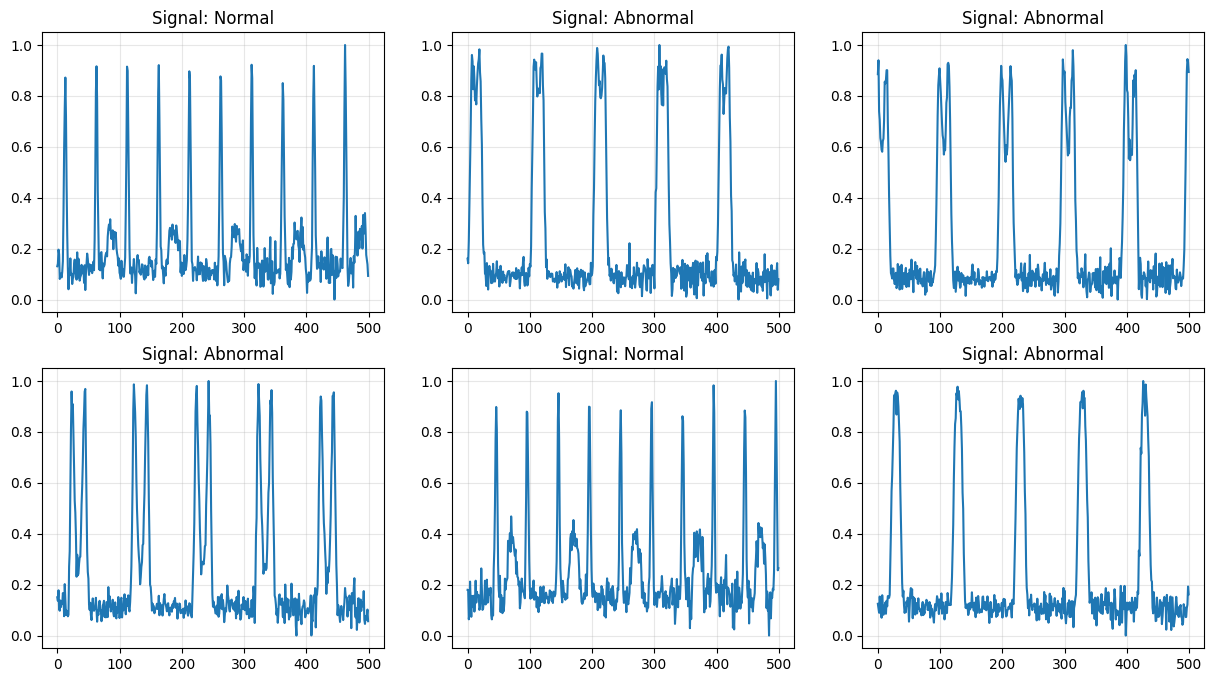

In [8]:
#b)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i in range(6):
    signal, label = signal_dataset[i]
    label_text = "Normal" if label == 0 else "Abnormal"

    axes[i].plot(signal)
    axes[i].set_title(f"Signal: {label_text}")
    axes[i].grid(True, alpha=0.3)


In [9]:
#c)
from torch.utils.data import random_split

train_size = int(0.7 * size_of_signal_dataset)
val_size = int(0.2 * size_of_signal_dataset)
test_size = size_of_signal_dataset - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    signal_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

In [10]:
#d)
import torch.nn as nn

input_size = 500
output_size = 2

model = nn.Sequential(
    nn.Linear(input_size, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, output_size)
)

In [18]:
#e)
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [12]:
#f)

cost_history = []
num_minibatches = 0

model.train() # Set mode to training
for inputs, labels in signal_dataloader:
    #Zero the gradients
    optimizer.zero_grad()

    #Forward pass: compute predicted outputs
    outputs = model(inputs)

    #Calculate loss
    loss = criterion(outputs, labels)

    #Backward pass: compute gradients
    loss.backward()

    #Update weights
    optimizer.step()

    #Record loss
    cost_history.append(loss.item())
    num_minibatches += 1

In [16]:
#g)
def evaluate_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad(): # Disable gradient calculation during evaluation
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            y_class_preds = outputs.argmax(dim=1)

            # Count correct predictions
            correct_predictions += (y_class_preds == labels).sum().item()
            total_samples += labels.size(0)

    # Calculate average loss and accuracy
    avg_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples

    return avg_loss, accuracy

Epoch 0: Train cost: 0.5654, Train Acc: 0.6550
          Val cost:   0.5604, Val Acc:   0.6812
Epoch 1: Train cost: 0.5307, Train Acc: 0.6550
          Val cost:   0.5259, Val Acc:   0.6812
Epoch 2: Train cost: 0.4770, Train Acc: 0.7944
          Val cost:   0.4809, Val Acc:   0.7862
Epoch 3: Train cost: 0.4064, Train Acc: 0.9277
          Val cost:   0.4147, Val Acc:   0.8986
Epoch 4: Train cost: 0.3065, Train Acc: 0.9556
          Val cost:   0.3151, Val Acc:   0.9420
Epoch 5: Train cost: 0.2050, Train Acc: 0.9742
          Val cost:   0.2149, Val Acc:   0.9638
Epoch 6: Train cost: 0.1408, Train Acc: 0.9876
          Val cost:   0.1506, Val Acc:   0.9819
Epoch 7: Train cost: 0.1138, Train Acc: 0.9897
          Val cost:   0.1291, Val Acc:   0.9783
Epoch 8: Train cost: 0.0751, Train Acc: 0.9928
          Val cost:   0.0934, Val Acc:   0.9855
Epoch 9: Train cost: 0.0582, Train Acc: 0.9959
          Val cost:   0.0787, Val Acc:   0.9855
Epoch 10: Train cost: 0.0534, Train Acc: 0.9928
  

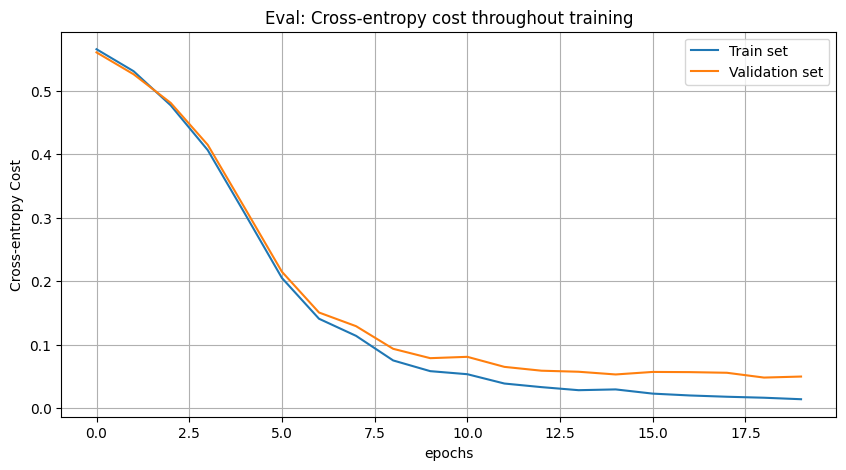

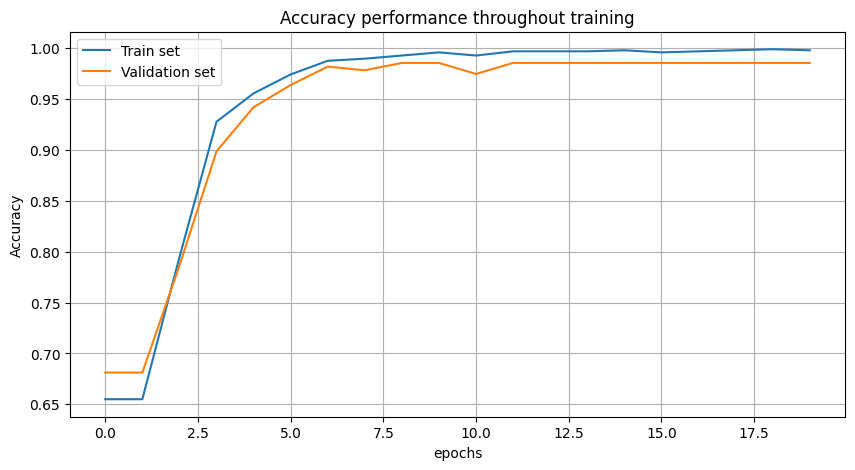

In [19]:
#h)
NUM_EPOCHS = 20 # Example number of epochs
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

train_cost_history = []
val_cost_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = evaluate_model(model, train_loader, criterion)
    val_loss, val_acc = evaluate_model(model, val_loader, criterion)

    # Store metrics
    train_cost_history.append(train_loss)
    val_cost_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    # Print results (similar to Figure 9)
    print(f"Epoch {epoch}: Train cost: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"          Val cost:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

    # 2. Training (SGD Inner Loop)
    model.train() # Set back to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

#Cost
epochs = range(NUM_EPOCHS)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_cost_history, label='Train set')
plt.plot(epochs, val_cost_history, label='Validation set')
plt.title('Eval: Cross-entropy cost throughout training')
plt.xlabel('epochs')
plt.ylabel('Cross-entropy Cost')
plt.grid(True)
plt.legend()
plt.show()

#Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_history, label='Train set')
plt.plot(epochs, val_acc_history, label='Validation set')
plt.title('Accuracy performance throughout training')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


# Task B: Multi-class Image Classification of FashionMNIST by FANNs

In [3]:
# # Code to access the FashionMNIST
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

from torchvision . transforms import ToTensor , Lambda , Compose
import matplotlib . pyplot as plt

# Download training data from open datasets .
training_data = datasets . FashionMNIST (
root = " data " ,
train = True ,
download = True ,
transform = ToTensor () ,
)

# Download test data from open datasets .
test_data = datasets . FashionMNIST (
root = " data " ,
train = False ,
download = True ,
transform = ToTensor () ,
)

In [4]:
size_of_fashion_dataset = len(training_data)
image_shape = training_data[0][0].shape
print(size_of_fashion_dataset)
print(image_shape)

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


60000
torch.Size([1, 28, 28])


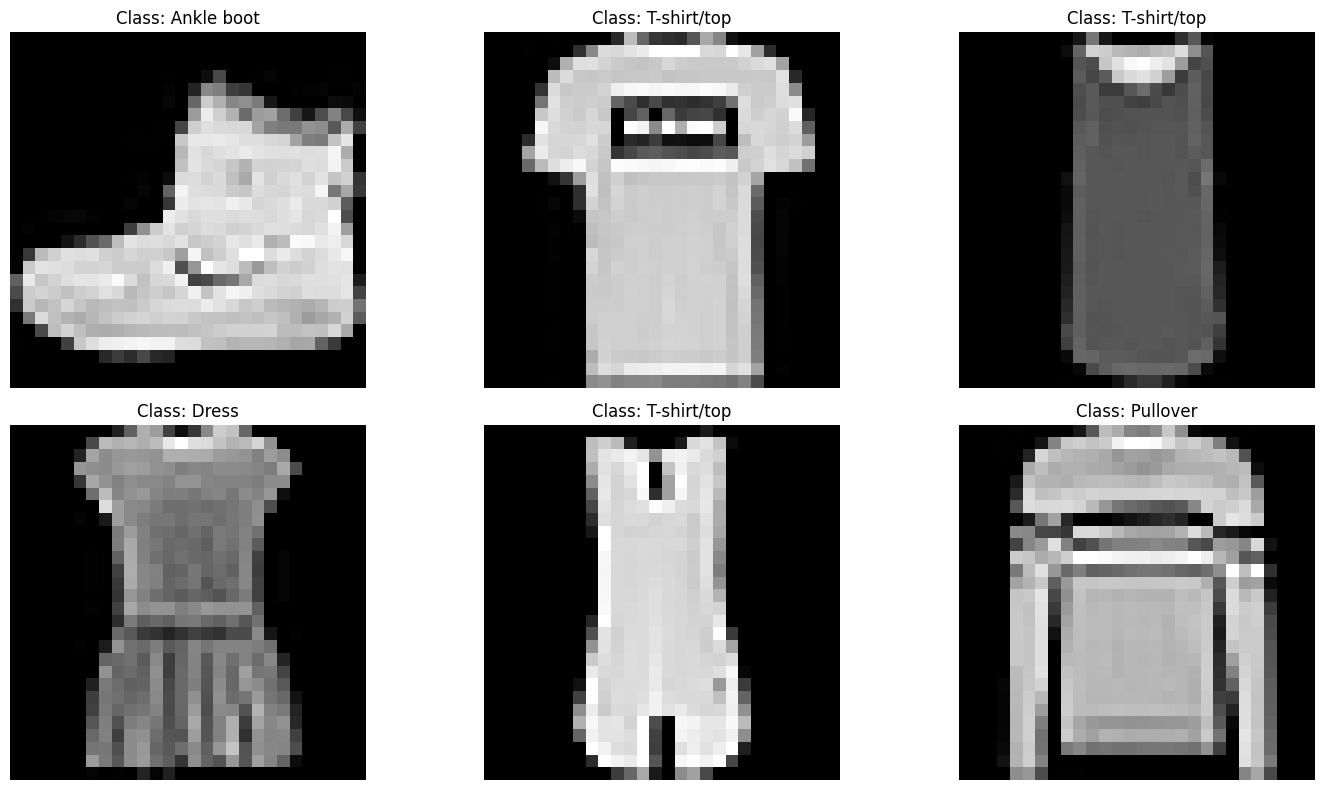

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten() # Flatten the 2D array of subplots

for i in range(6):
    image, label = training_data[i]
    label_text = classes[label]

    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Class: {label_text}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [19]:

from torch.utils.data import random_split

# Split the training data into train and validation sets
train_size = int(0.8 * len(training_data))  # 80% for training
val_size = len(training_data) - train_size  # 20% for validation

train_dataset, val_dataset = random_split(
    training_data,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

test_dataset = test_data


In [20]:
import torch.nn as nn

input_size = 784
output_size = 10

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, output_size)
)

In [21]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0005)

In [22]:
# Create DataLoader for training
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

cost_history = []
num_minibatches = 0

model.train()
for inputs, labels in train_dataloader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    cost_history.append(loss.item())
    num_minibatches += 1

In [23]:
def evaluate_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad(): # Disable gradient calculation during evaluation
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            y_class_preds = outputs.argmax(dim=1)

            # Count correct predictions
            correct_predictions += (y_class_preds == labels).sum().item()
            total_samples += labels.size(0)

    # Calculate average loss and accuracy
    avg_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples

    return avg_loss, accuracy

Epoch 1: Train cost: 2.2936, Train Acc: 0.1455
           Val cost:   2.2944, Val Acc:   0.1472
Epoch 2: Train cost: 2.2845, Train Acc: 0.2039
           Val cost:   2.2854, Val Acc:   0.2009
Epoch 3: Train cost: 2.2714, Train Acc: 0.2129
           Val cost:   2.2723, Val Acc:   0.2097
Epoch 4: Train cost: 2.2511, Train Acc: 0.2283
           Val cost:   2.2520, Val Acc:   0.2254
Epoch 5: Train cost: 2.2152, Train Acc: 0.2369
           Val cost:   2.2162, Val Acc:   0.2328
Epoch 6: Train cost: 2.1491, Train Acc: 0.2454
           Val cost:   2.1501, Val Acc:   0.2394
Epoch 7: Train cost: 2.0393, Train Acc: 0.2721
           Val cost:   2.0411, Val Acc:   0.2679
Epoch 8: Train cost: 1.8894, Train Acc: 0.3119
           Val cost:   1.8934, Val Acc:   0.3053
Epoch 9: Train cost: 1.7128, Train Acc: 0.3695
           Val cost:   1.7196, Val Acc:   0.3626
Epoch 10: Train cost: 1.5503, Train Acc: 0.4224
           Val cost:   1.5572, Val Acc:   0.4102
Epoch 11: Train cost: 1.4086, Train Acc

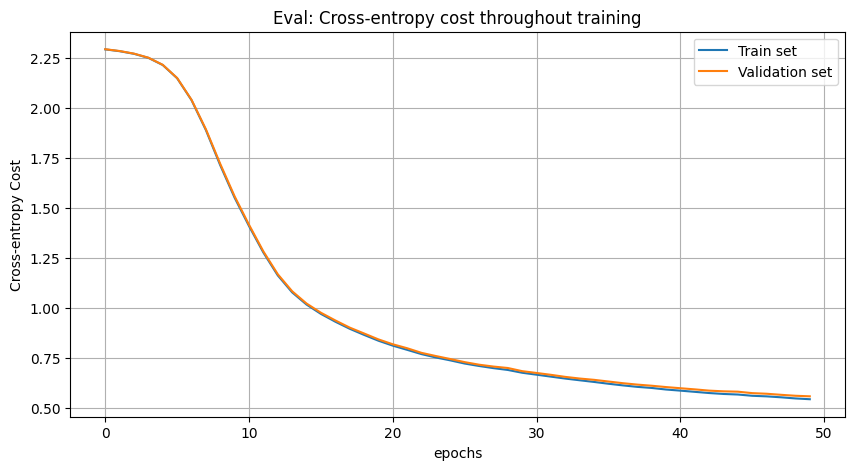

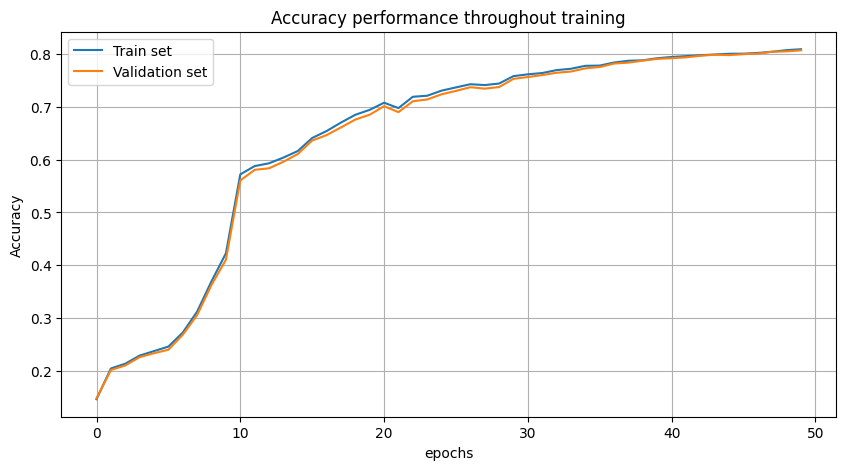

Final FANN Classifier Test Accuracy: 0.7976


In [24]:
NUM_EPOCHS = 50  # Example number of epochs
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

train_cost_history = []
val_cost_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(NUM_EPOCHS):
    # 1. Training (SGD Inner Loop) - Train first
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # 2. Evaluation after training
    train_loss, train_acc = evaluate_model(model, train_loader, criterion)
    val_loss, val_acc = evaluate_model(model, val_loader, criterion)

    # Store metrics
    train_cost_history.append(train_loss)
    val_cost_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    # Print results
    print(f"Epoch {epoch + 1}: Train cost: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"           Val cost:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

#Cost
epochs = range(NUM_EPOCHS)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_cost_history, label='Train set')
plt.plot(epochs, val_cost_history, label='Validation set')
plt.title('Eval: Cross-entropy cost throughout training')
plt.xlabel('epochs')
plt.ylabel('Cross-entropy Cost')
plt.grid(True)
plt.legend()
plt.show()

#Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_history, label='Train set')
plt.plot(epochs, val_acc_history, label='Validation set')
plt.title('Accuracy performance throughout training')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

print(f"Final FANN Classifier Test Accuracy: {test_accuracy:.4f}")


*Defect inspection in manufacturing:* In production lines, image classification systems are trained to categorize products as defective or acceptable based on visual attributes like surface defects, imperfections, or incorrect colors. This boosts efficiency and accuracy in manufacturing processes, often exceeding human inspection rates.

*Automated inventory management:* Classification models analyze real-time or periodic images of store shelves to identify product positions and detect out-of-stock items. This application is of high commercial importance as it minimizes lost sales due to empty shelves and optimizes restocking logistics.

# Task C: Convolutional ANNs

# Problem 1: CNN Theory

a) Adjustable Parameters:

Weights: $m * m$

Bias: 1

total number: $ m^2 + 1$

b) 2 feature maps

total parameters: $2 * (m^2 +1)$

The number of adjustable parameters doesn't depend on the input image size because of parameter sharing. The same small kernel is applied repeatedly across the entire input image to produce the feature map, so the number of unique weights remains constant regardless of the input dimensions.

c) Resonable kernal size

For a small image like 28 x 28, a resonable size is 3 x 3 or 5 x 5

A 27 x 27 karnel is to large because it covers almost the entire image, defeating the purpose of a CNN's local feature extraction

It significantly increases the number of parameters ($27^2 = 729$ weights), making it computationally expensive, similar to a fully connected layer.

Since it covers nearly the whole image, the key efficiency benefit of parameter sharing is lost.

# Problem 2: Image Classification using a CNN

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) #first convolutional layer: input_channels, output_channels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #max pooling layer 2x2
        self.conv2 = nn.Conv2d(32, 64, 3)  #second convolutional layer: input_channels, output_channels, kernel_size
        self.fc1 = nn.Linear(64 * 5 * 5, 128) #Fully connected layer: input_size, output_size
        self.fc2 = nn.Linear(128, 10) #Fully connected output layer: number of classes

#Forward pass
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)  # PyTorch's equivalent to numpy.reshape()
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # No softmax at the end although classification
        return x


# Initialize the model
net = Net()

# Define the loss function, learning rate and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Load and preprocess the FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Training loop
for epoch in range(10):  # Change the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

# Save the parameters of the trained model
torch.save(net.state_dict(), 'fashion_mnist_cnn.pth')


[Epoch 1, Batch 100] Loss: 0.938
[Epoch 1, Batch 200] Loss: 0.547
[Epoch 1, Batch 300] Loss: 0.495
[Epoch 1, Batch 400] Loss: 0.469
[Epoch 1, Batch 500] Loss: 0.427
[Epoch 1, Batch 600] Loss: 0.401
[Epoch 1, Batch 700] Loss: 0.401
[Epoch 1, Batch 800] Loss: 0.386
[Epoch 1, Batch 900] Loss: 0.372
[Epoch 2, Batch 100] Loss: 0.367
[Epoch 2, Batch 200] Loss: 0.336
[Epoch 2, Batch 300] Loss: 0.333
[Epoch 2, Batch 400] Loss: 0.316
[Epoch 2, Batch 500] Loss: 0.325
[Epoch 2, Batch 600] Loss: 0.317
[Epoch 2, Batch 700] Loss: 0.301
[Epoch 2, Batch 800] Loss: 0.298
[Epoch 2, Batch 900] Loss: 0.294
[Epoch 3, Batch 100] Loss: 0.270
[Epoch 3, Batch 200] Loss: 0.269
[Epoch 3, Batch 300] Loss: 0.267
[Epoch 3, Batch 400] Loss: 0.271
[Epoch 3, Batch 500] Loss: 0.292
[Epoch 3, Batch 600] Loss: 0.276
[Epoch 3, Batch 700] Loss: 0.258
[Epoch 3, Batch 800] Loss: 0.274
[Epoch 3, Batch 900] Loss: 0.269
[Epoch 4, Batch 100] Loss: 0.244
[Epoch 4, Batch 200] Loss: 0.228
[Epoch 4, Batch 300] Loss: 0.251
[Epoch 4, 

b) The kernel size in the first layer is 3 x 3

c) look at included pdf

In [4]:
#perform the testing batchwise
correct_train = 0
total_train = 0
with torch.no_grad():
    for images, labels in trainloader:
        outputs = net(images)
        predicted_values, predicted_indicies = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_indicies == labels).sum().item()

#Calculate Accuracy
accuracy_train = 100 * correct_train / total_train
print(f'Accuracy on the train dataset:{accuracy_train:.2f}%')
print ("No of training examples:", total_train)

Accuracy on the train dataset:96.01%
No of training examples: 60000


e) The loss function used is Cross-Entropy Loss

Training relies on Gradient Descent, which needs a smooth cost function to calculate the gradients.

Misclassification is non smooth, which means it provides a poor or zero gradient.

Cross-Entropy Loss is a smooth cost function that provides a good gradient.


# Problem 3: Performance Estimation of a CNN

In [5]:
loaded_model = Net()  # initialize the model
loaded_model.load_state_dict(torch.load('fashion_mnist_cnn.pth'))
loaded_model.eval()  # Put it in evaluation mode

# Load and preprocess the FashionMNIST TEST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Perform the testing batchwise
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = loaded_model(images)
        predicted_values, predicted_indicies = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted_indicies == labels).sum().item()

# Calculate Accuracy
accuracy_test = 100 * correct_test / total_test
print(f'Accuracy on the test dataset: {accuracy_test:.2f}%')
print("No of testexamples:", total_test)


Accuracy on the test dataset: 91.07%
No of testexamples: 10000


b) the difference of 4.94% indicates that the CNN has overfitted to the training data.

The high training accuracy shows that the network performed very good on the data it was trained on. The drop in performance on the independent test set reveals that the features the model leared were too specific to the training examples.

c) The CNN got an accuracy of 91.07%, which is 5.46% higher than the FANN's accuracy of 85.61%.

The CNN performs better because its architecture is designed specifically for images, but the FANN treats the image as a flat vector.

The CNN's small convolutional kernels and pooling layers are highly effective at finding and consolidating local features like edges and curves in the $28 \times 28$


